In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio

# name of the input file
#imname = 'C:\Users\chris\Desktop\cs180\ChristopherDuroiu.github.io\proj1\cs180 proj1 data\cathedral.jpg'
imname = 'cs180 proj1 data\cathedral.jpg'

im = skio.imread(imname)

In [5]:
im.shape

(1024, 390)

In [6]:
im = sk.img_as_float(im)

In [8]:
im.shape

(1024, 390)

In [10]:
height = np.floor(im.shape[0] / 3.0).astype(int)

In [15]:
b_channel = im[:height]

In [16]:
g_channel = im[height:2 * height]

In [61]:
r_channel.shape

(342, 390)

In [62]:
r_channel = im[2 * height:3 * height]
r_channel.shape

(341, 390)

In [18]:
im[0][:20]

array([0.99215686, 0.99215686, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99215686, 0.99215686,
       0.99215686, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843])

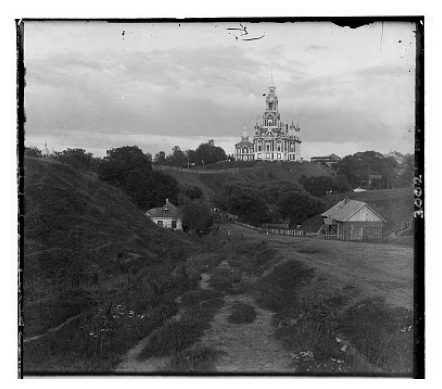

In [22]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(b_channel, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

In [36]:
cropped_b_channel = b_channel[20:-20, 20:-20]

In [37]:
cropped_b_channel.shape

(301, 350)

In [38]:
b_channel.shape

(341, 390)

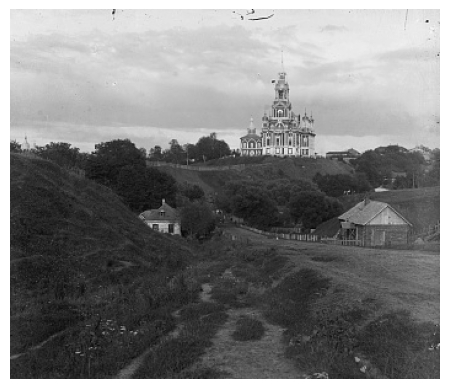

In [39]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(cropped_b_channel, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

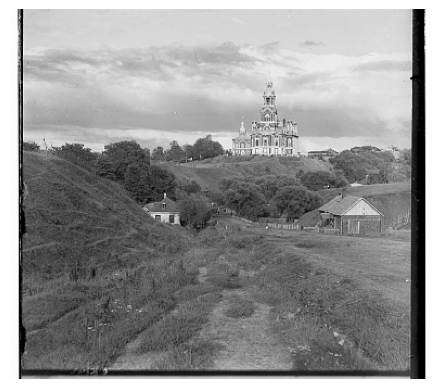

In [40]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(g_channel, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

In [41]:
cropped_g_channel = g_channel[20:-20, 20:-20]

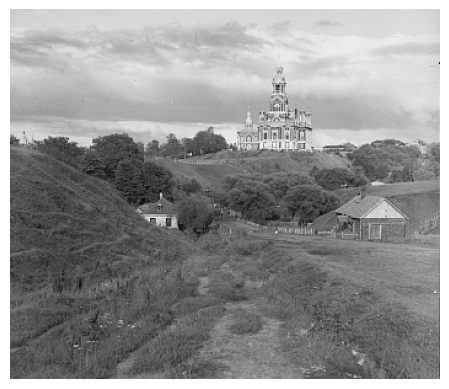

In [42]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(cropped_g_channel, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

In [43]:
cropped_r_channel = r_channel[20:-20, 20:-20]

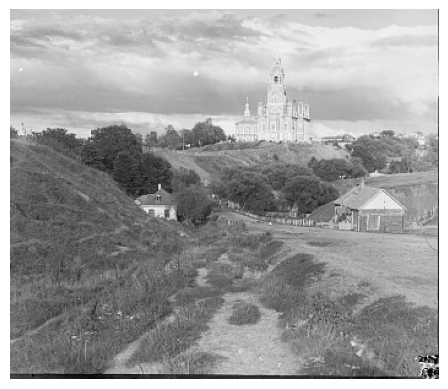

In [44]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(cropped_r_channel, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

In [46]:
breaking = []
val = 0
while b_channel[20][val] > 0.5:
    val += 1

print(val)
    

6


In [47]:
b_channel[20][:10]

array([0.99607843, 0.99215686, 1.        , 0.98431373, 0.99215686,
       0.96470588, 0.00784314, 0.31372549, 0.20784314, 0.15686275])

In [67]:
channels = [b_channel, g_channel, r_channel]

glob_col_start_ind = 0
global_col_end_ind = 1 << 30

for channel in channels:
    print(channel.shape)
    for row_ind in range(channel.shape[0])[30:-30]:
        col_ind = 0
        while col_ind < channel.shape[1] and channel[row_ind][col_ind] > 0.5:
            col_ind += 1
        glob_col_start_ind = max(glob_col_start_ind, col_ind)

    for row_ind in range(channel.shape[0], 0, -1)[30:-30]:
        col_ind = channel.shape[1] - 1
        while col_ind >= 0 and channel[row_ind][col_ind] > 0.5:
            col_ind -= 1
        global_col_end_ind = min(global_col_end_ind, col_ind)



(341, 390)
(341, 390)
(341, 390)


In [68]:
glob_col_start_ind

11

In [69]:
global_col_end_ind

381

In [72]:
def crop_white_borders(channels):
    glob_col_start_ind = 0
    global_col_end_ind = 1 << 30
    
    for channel in channels:
        for row_ind in range(channel.shape[0])[30:-30]:
            col_ind = 0
            while channel[row_ind][col_ind] > 0.5:
                col_ind += 1
            glob_col_start_ind = max(glob_col_start_ind, col_ind)
    
        for row_ind in range(channel.shape[0], -1, -1)[30:-30]:
            col_ind = channel.shape[1] - 1
            while channel[row_ind][col_ind] > 0.5:
                col_ind -= 1
            global_col_end_ind = min(global_col_end_ind, col_ind)

    glob_row_start_ind = 0
    glob_row_end_ind = 1 << 30

    for channel in channels:
        for col_ind in range(channel.shape[1])[30:-30]:
            row_ind = 0
            while channel[row_ind][col_ind] > 0.5:
                row_ind += 1
            print(row_ind)
            glob_row_start_ind = max(glob_row_start_ind, row_ind)

        for col_ind in range(channel.shape[1] - 1, -1, -1)[30:-30]:
            row_ind = 0
            while channel[row_ind][col_ind] > 0.5:
                row_ind -= 1
            glob_row_end_ind = min(glob_row_end_ind, row_ind)

    return glob_col_start_ind, global_col_end_ind, glob_row_start_ind, glob_row_end_ind

In [81]:
def partition_image(image, black_prop=0.04):
    glob_col_start_ind = 0
    glob_col_end_ind = 1 << 30
    
    for row_ind in range(image.shape[0])[30:-30]:
        col_ind = 0
        while image[row_ind][col_ind] > 0.5:
            col_ind += 1
        glob_col_start_ind = max(glob_col_start_ind, col_ind)

    for row_ind in range(image.shape[0])[30:-30]:
        col_ind = image.shape[1] - 1
        while image[row_ind][col_ind] > 0.5:
            col_ind -= 1
        global_col_end_ind = min(glob_col_end_ind, col_ind)

    glob_row_start_ind = 0
    glob_row_end_ind = 1 << 30

    for col_ind in range(image.shape[1])[30:-30]:
        row_ind = 0
        while image[row_ind][col_ind] > 0.5:
            row_ind += 1
       # print(row_ind)
        glob_row_start_ind = max(glob_row_start_ind, row_ind)

    for col_ind in range(image.shape[1])[30:-30]:
        row_ind = image.shape[0] - 1
        while image[row_ind][col_ind] > 0.5:
            row_ind -= 1
        glob_row_end_ind = min(glob_row_end_ind, row_ind)
   
   # return glob_col_start_ind, global_col_end_ind, glob_row_start_ind, glob_row_end_ind
    cropped_im = im[glob_row_start_ind:glob_row_end_ind, glob_col_start_ind:glob_col_end_ind]
    height = np.floor(cropped_im.shape[0] / 3.0).astype(int)
    b = cropped_im[:height]
    g = cropped_im[height: 2*height]
    r = cropped_im[2*height: 3*height]
    graph(r, g, b)

    buff = b.shape[0] * black_prop
    c_buff = b.shape[1] * black_prop
    
    b = b[buff:-buff, buff:-buff]
    g = g[buff:-buff, buff:-buff]
    r = r[buff:-buff, buff:-buff]
    return r, g, b

In [124]:
crop_white_borders(im)

(11, 381, 9, 1012)

In [125]:
im.shape

(1024, 390)

In [126]:
cropped_im = im[9:1012, 11:381]

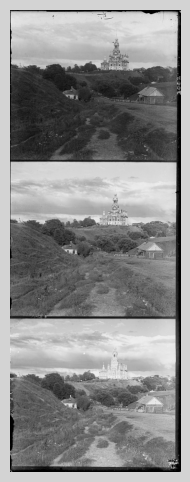

In [127]:
from skimage import io as skio
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), facecolor="lightgray")  # light gray background
ax.imshow(cropped_im, cmap='gray')
ax.axis("off")
plt.show()

In [128]:
height = np.floor(cropped_im.shape[0] / 3.0).astype(int)

In [129]:
b = cropped_im[:height]
g = cropped_im[height: 2*height]
r = cropped_im[2*height: 3*height]

In [131]:
b = b[10:-10, 10:-10]
g = g[10:-10, 10:-10]
r = r[10:-10, 10:-10]

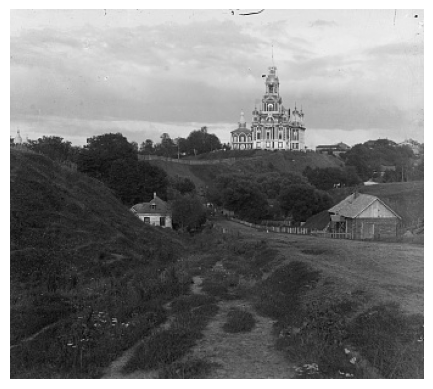

In [97]:
from skimage import io as skio
import matplotlib.pyplot as plt

plt.imshow(b, cmap='gray')   # cmap='gray' ensures grayscale display
plt.axis('off')               # hides axes
plt.show()

In [132]:
b.shape

(314, 350)

In [99]:
g.shape

(304, 340)

In [100]:
r.shape

(304, 340)

In [101]:
def graph(r_channel, g_channel, b_channel):
    rgb_image = np.dstack((r_channel, g_channel, b_channel))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

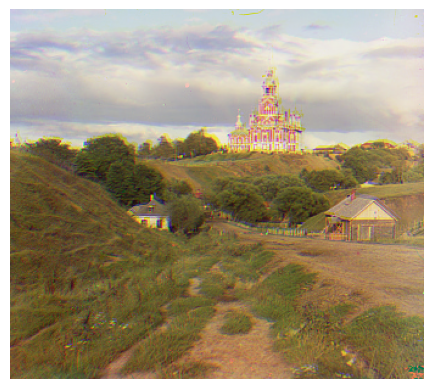

In [105]:
graph(r, g, b)

In [118]:
def realign(base_channel, add_channel):
    min_diff = 1 << 30
    best_dr, best_dc = None, None
    
    for off_y in range(-15, 16):
        for off_x in range(-15, 16):
            curr_sum = 0
            for row in range(15, base_channel.shape[0] - 15):
                for col in range(15, base_channel.shape[1] - 15):
                    curr_sum += (add_channel[off_y + row][off_x + col] - base_channel[row][col]) ** 2

            if curr_sum < min_diff:
                best_dr, best_dc = off_y, off_x
                min_diff = curr_sum

    return np.roll(add_channel, (-best_dr, -best_dc), axis=(0, 1))
                
    # if best_dr > 0:
    #     shifted_base = base_channel[best_dr:]
    #     shifted_add = add_channel[:-best_dr]
    # else:
    #     shifted_base = base_channel[:best_dr]
    #     shifted_add = add_channel[-best_dr:]
    # if best_dc > 0:
    #     shifted_base = shifted_base[:, best_dc:]
    #     shifted_add = shifted_add[:, :-best_dc]
    # else:
    #     shifted_base = shifted_base[:, :best_dc]
    #     shifted_add = shifted_add[:, -best_dc:]
    # print(best_dr, best_dc)
    # return shifted_base, shifted_add

In [119]:
roll_g = realign(b, g)

In [116]:
shift_base.shape

(302, 338)

In [117]:
shift_add.shape

(302, 338)

In [120]:
roll_g.shape

(304, 340)

In [121]:
roll_r = realign(b, r)

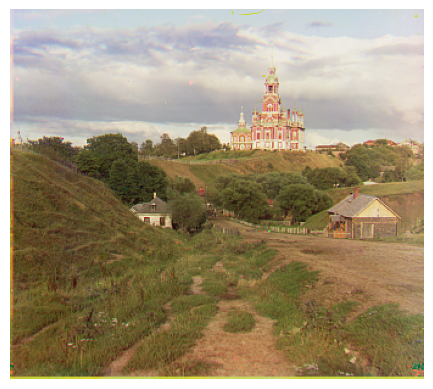

In [122]:
graph(roll_r, roll_g, b)

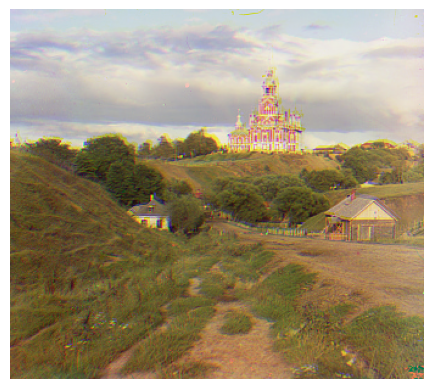

In [123]:
graph(r, g, b)

In [7]:
def get_offsets(manh_dist):
    if manh_dist == 0:
        return [(0, 0)]
    
    offsets = []
    for dy in range(-manh_dist, manh_dist + 1):
        dx = manh_dist - abs(dy)
        if dx != 0:
            offsets.append((dy, dx))
            offsets.append((dy, -dx))
        else:
            offsets.append((dy, 0))
    return offsets

In [8]:
get_offsets(0)

[(0, 0)]

In [9]:
get_offsets(1)

[(-1, 0), (0, 1), (0, -1), (1, 0)]

In [10]:
get_offsets(2)

[(-2, 0), (-1, 1), (-1, -1), (0, 2), (0, -2), (1, 1), (1, -1), (2, 0)]